In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing Dataset into a pandas dataframe

dia_df = pd.read_csv("diabetes.csv")
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

<Figure size 1000x1500 with 0 Axes>

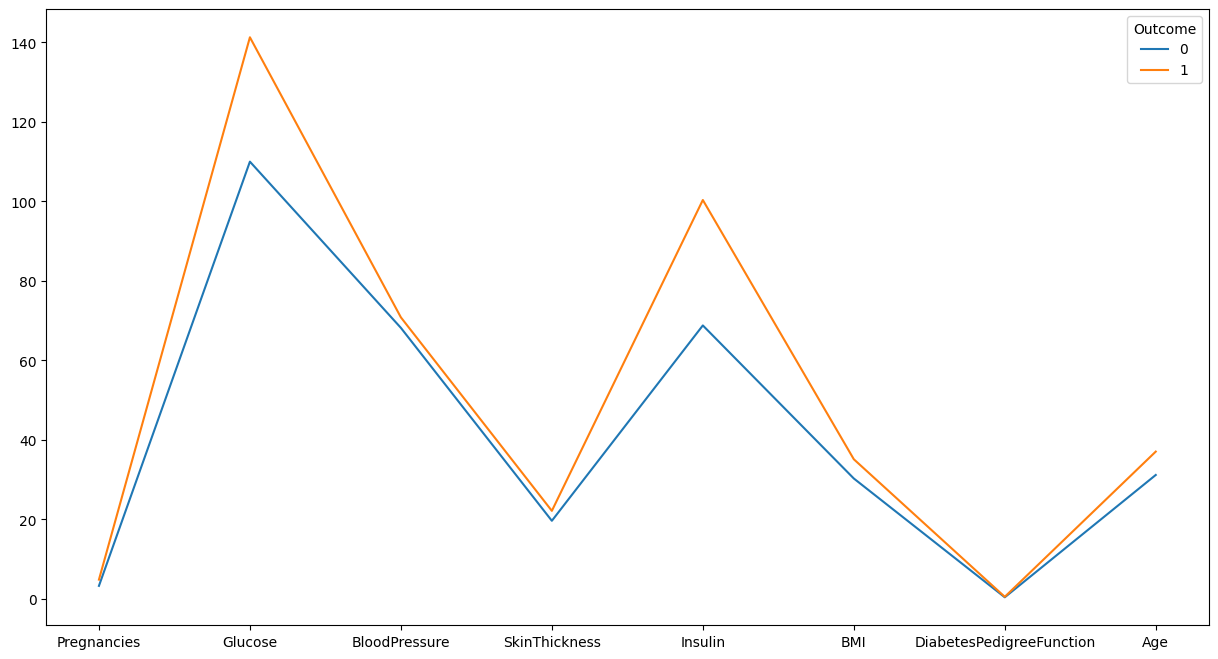

In [23]:
plt.figure(figsize=(10,15))
dia_df.groupby('Outcome').mean().T.plot(figsize=(15,8), kind='line')

In [24]:
dia_df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split , GridSearchCV

X = dia_df.drop('Outcome', axis=1)
y = dia_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((614, 8), (154, 8), (614,), (154,))

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svcmodel = SVC()
params = {
        'kernel': ['rbf','linear', 'poly'],
        'C' : [1,2,4,6,8,10],
        'degree' : [3,6,9]
         }

grid = GridSearchCV(svcmodel, params, cv=5, scoring='accuracy')
pipe = make_pipeline(StandardScaler(), grid)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [1, 2, 4, 6, 8, 10],
                                          'degree': [3, 6, 9],
                                          'kernel': ['rbf', 'linear', 'poly']},
                              scoring='accuracy'))])

In [40]:
grid.best_estimator_

SVC(C=1, kernel='linear')

In [41]:
from sklearn.metrics import accuracy_score

yhat = pipe.predict(X_test)
accuracy_score(y_test, yhat)

0.8311688311688312

In [42]:
sv = SVC(C=2, kernel='linear')
pipe = make_pipeline(StandardScaler(), sv)
pipe.fit(X_train, y_train)
y_ = pipe.predict(X_test)
accuracy_score(y_test, y_)

0.8246753246753247

In [43]:
import pickle 
with open('model.dat', 'wb') as file:
    pickle.dump(pipe, file)